# What Can we Learn From Twitter? 

## Code and Text written by: <br/>
## Cara Messina ~~ *NULab Coordinator*<br/>Alexis Yohros ~~ *Digital Teaching Integration Research Assistant*<br/>Laura Nelson ~~ *Assistant Professor of Sociology*<br/><br/>Northeastern University
### Prepared for Professor Panagopoulos <br/> October, 2018
<br/>
<br/>

![title](https://bddf794624247cea6a0b-b4761d2ba0154d0278c36dbf2b3c114d.ssl.cf1.rackcdn.com/twitter_logo_bird_transparent_png1464104142328.png)


## Introduction
For this short lecture, we will be discussing some methods in Computational Social Science, and the influence of Data Analytics in Political Science and other Social Science disciplines. Computational Social Science uses computational methods to approach social science questions; for data analytics, data is collected, stored, analyzed, and visualized to better understand patterns in human behavior and action.

In both applied politics and academic political science research, computational techniques have gained considerable traction for the purposes of analyzing causal relationships, making useful classifications, and forecasting.

## Learning Outcomes

By the end of this short exploration, you should be able to:

* Explain what it means to use Twitter as data
* List some of the ways scholars and campaigns are using Twitter data
* Understand the basic technical details behind how you get your computer to access Twitter data, structure it (and what this means!), and analyze it
* Discuss both the promises and pitfall of using Twitter as data

## Outline
1. Twitter as a Source of Data  
    * Discussion: What do you see in Twitter data?  
    * What are people doing with it?  
2. Peak Behind the Hood: Twitter scraping and text analysis basics
3. Sandbox: Collective exploration of Twitter data
4. Discussion: Promises and pitfalls of Twitter data as it relates to campaigns

# 1. Twitter as a Source of Data

## A. Small Group Discussion

![title](images/group.png)

Turn to your neighbors and open Twitter. Search for a keyword related to the elections. Read through some of the tweets that are returned and discuss the following questions:

1. What are the main themes of the Tweets? **How did you identify this?**
2. What are Democrats talking about? What are Republicans talking about? **How did you identify who are Democrats and who are Republicans?**
3. What do you think a computer can do with these Tweets that you can't do yourself?
4. How do you think campaigns advisors or politicians might use this information?

## B. How are others using Twitter data?

### i. Tweets can predict elections:

Beauchamp, N. (2017). Predicting and interpolating state‐level polls using Twitter textual data. *American Journal of Political Science*, 61(2), 490-503.

![title](images/textprediction.png)
![title](images/ohiopolling.png)




### ii. Does exposure to opposing viewpoints change your opinion?

Christopher A. Bail, Lisa P. Argyle, Taylor W. Brown, John P. Bumpus, Haohan Chen, M. B. Fallin Hunzaker, Jaemin Lee, Marcus Mann, Friedolin Merhout, and Alexander Volfovsky.
*PNAS*, published August 28, 2018 https://doi.org/10.1073/pnas.1804840115

![title](images/politicalexposure.jpg)

# 2. Peek Behind the Hood

How do the reserachers do this? How do they access Twitter data?

They scrape it! What does this mean?

Using TAGS, which is a Twitter scraper, Cara Messina "scraped" the most recent ~5,000 Tweets that used one of these four words: election, elections, midterm, or midterms.

Let's take a look:

TAGS: https://tags.hawksey.info/ 

And what do we get? We'll use Python to see!

In [1]:
import pandas
import csv
import seaborn as sns
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib as mpl
from matplotlib import pyplot as plt
pandas.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
from sklearn.manifold import TSNE
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

pandas.options.display.float_format = '{:.2f}'.format

In [2]:
df = pandas.read_csv("./twitter-election-elections-midterm-midterms.csv", index_col = 0)
#clean up a few things
df['user_location'][df['user_location']=='USA'] = 'United States'
df['user_location'][df['user_location']=='New York, NY'] = 'New York, USA'
df['user_location'][df['user_location']=='NYC'] = 'New York, USA'
df['text_lc'] = df['text'].str.lower()

#Take a peek at our data
df.head()

,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,text_lc
id_str,,,,,,,,,,,,,,,,,,
1040389661364023302,BadgerStew,RT @BadgerStew: 1) Scott Walker is a stone col...,Thu Sep 13 23:59:59 +0000 2018,14/09/2018 00:59:59,NaN,en,nan,NaN,2252299098,nan,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1038075651...,3646.00,3234.00,"Radio Free Gilead, Wisconsin",http://twitter.com/BadgerStew/statuses/1040389...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",rt @badgerstew: 1) scott walker is a stone col...
1040389660499959808,tetch2176,RT @RealJamesWoods: This is the kind of nonsen...,Thu Sep 13 23:59:59 +0000 2018,14/09/2018 00:59:59,NaN,en,nan,NaN,373141513,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9922431493...,393.00,544.00,"42.896671,-85.767085",http://twitter.com/tetch2176/statuses/10403896...,"{""hashtags"":[{""text"":""Democrats"",""indices"":[49...",rt @realjameswoods: this is the kind of nonsen...
1040389660130856960,Smog2014,RT @schwartznewsNY: Suffolk Democratic turnout...,Thu Sep 13 23:59:59 +0000 2018,14/09/2018 00:59:59,NaN,en,nan,NaN,2257569312,nan,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8655604876...,167.00,73.00,NaN,http://twitter.com/Smog2014/statuses/104038966...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",rt @schwartznewsny: suffolk democratic turnout...
1040389659916951552,InGodWeTrust4US,RT @girl4_trump: Ev-ry-thing leads back to #Hi...,Thu Sep 13 23:59:59 +0000 2018,14/09/2018 00:59:59,NaN,en,nan,NaN,1649026550,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1021252149...,758.00,709.00,On earth,http://twitter.com/InGodWeTrust4US/statuses/10...,"{""hashtags"":[{""text"":""Hillary"",""indices"":[43,5...",rt @girl4_trump: ev-ry-thing leads back to #hi...
1040389658209738752,pqpolitics,RT @RickHurlbut: @fabulavancouver There are al...,Thu Sep 13 23:59:58 +0000 2018,14/09/2018 00:59:58,NaN,en,nan,NaN,246667561,nan,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5089502416...,6549.00,5932.00,"Vancouver, BC",http://twitter.com/pqpolitics/statuses/1040389...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",rt @rickhurlbut: @fabulavancouver there are al...


Let's talk about what we did there.

Note:
1. The geo_coordinates column, why all the NaN? What is NaN?
2. The user_location column. What is this? What do you notice about it?
3. The time column. What is this? What date were these Tweets collected? This will be important later.


**Why did we do this? And now what? We can now quickly learn a lot about what's going on on Twitter.**

## A. How many followers on average?

Question: What do you immediately notice?

In [3]:
df[['user_followers_count', 'user_friends_count']].describe()

,user_followers_count,user_friends_count
count,4947.00,4942.00
mean,6071.66,2783.08
std,97816.49,6462.09
min,1.00,1.00
25%,205.50,282.00
50%,759.00,908.00
75%,2747.00,2989.50
max,4887829.00,210148.00


## B. Where are they located?

Note: Only around 20% of Tweets contain geographical metadata.

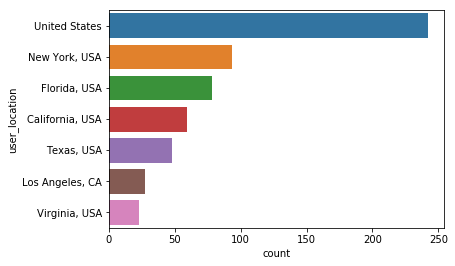

In [4]:
sns.countplot(y=df['user_location'], order=df.user_location.value_counts().iloc[:7].index)

## C. Most Frequent Words

Question: What do you conclude from this?

In [5]:
global punct_list
global stop_words

punct_list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.', '/', ':', ';', 
                     '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '\n']
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
                     'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 
                     'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
                     'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
                     'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
                     'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
                     'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 
                     'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
                     'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                     'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
                     'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
                     'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn',
                     'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan',
                     'shouldn', 'wasn', 'weren', 'won', 'wouldn']

#Function to print the 10 most frequent words in a text
#Input: string
#Output: list of tuples


def freq_words(text):
    counts = dict()
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in punct_list])
    text_list = text.split()
    text_list = [word for word in text_list if word not in stop_words]
    for word in text_list:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1

    freq_words = []
    for key, val in counts.items():
        freq_words.append((val, key))
    freq_words.sort(reverse=True)
    return(freq_words[:50])

text = (' '.join([t for t in df['text'].tolist()]))

freq_words(text)

[(4235, 'rt'),
 (2725, 'election'),
 (1006, 'google'),
 (978, 'elections'),
 (865, 'vote'),
 (746, '2016'),
 (617, 'amp'),
 (552, 'russia'),
 (548, 'political'),
 (497, 'bias'),
 (479, 'much'),
 (473, 'conservative'),
 (472, 'special'),
 (471, 'tech'),
 (466, 'people'),
 (462, 'get'),
 (459, 'investigation'),
 (453, 'companies'),
 (450, 'charliekirk11'),
 (448, 'silence'),
 (447, 'meddled'),
 (444, 'engage'),
 (443, 'voices🤔'),
 (443, 'engineering'),
 (443, 'didhow'),
 (443, 'behavioral'),
 (400, 'us'),
 (385, 'midterm'),
 (377, 'democrats'),
 (356, 'day'),
 (351, 'new'),
 (344, 'trump'),
 (342, 'every'),
 (336, 'win'),
 (328, 'ny'),
 (325, 'still'),
 (325, 'midterms'),
 (321, 'time'),
 (304, 'voting'),
 (299, 'president'),
 (298, '-'),
 (297, 'make'),
 (284, 'voted'),
 (262, 'women'),
 (243, 'voter'),
 (242, 'run'),
 (242, 'i’m'),
 (238, 'states'),
 (236, 'state'),
 (223, 'republicans')]

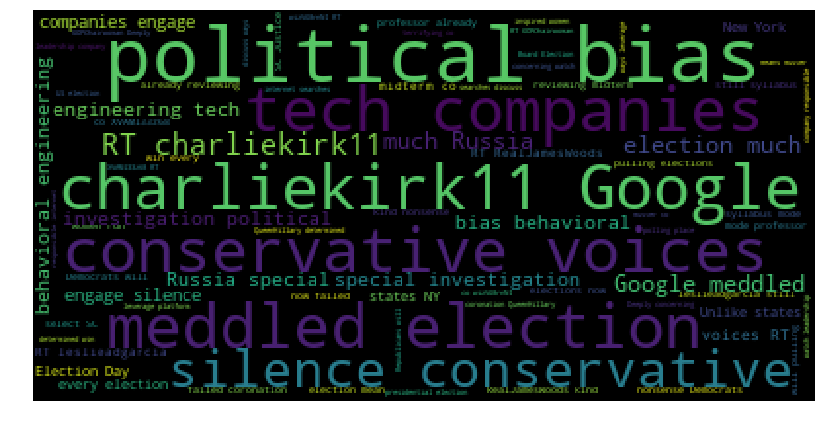

In [6]:
#word cloud using bigrams (two words in a row)

STOPWORDS.add('https')

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          collocations = True,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42,
                         ).generate(text)

fig = plt.figure(1, figsize=(14,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Question: Why does Google and meddled appear so often?

What was happening in September around the time these Tweets were collected?

On September 11, Tucker Carlson reported on a leaked email from a Google executive that revealed efforts to increase Latin@ voter turnout in the 2016 elections, prompting headlines such as: "Did Google Meddle in the 2016 Elections More than Russia?"

![title](images/Google_Medling.png)


**************************************
### **Take-Away: News cycles are fast. *When* you collect your Tweets matters, and matters a lot.**

## C. Sentiment Analysis

In [7]:
def polarity(text):
    text_blobbed = TextBlob(text)
    return text_blobbed.sentiment.polarity

In [8]:
def subjectivity(text):
    text_blobbed = TextBlob(text)
    return text_blobbed.sentiment.subjectivity

In [9]:
df['polarity'] = df['text'].apply(polarity)

df['subjectivity'] = df['text'].apply(subjectivity)

What does 'polarity' and 'subjectiviy' mean? We can look at the TextBlob documentation to see how they calculated it (it's open source, no hidden or black box algorithsm!). But let's take a look.

Questions to think about as we look at these tweets:

1. Are these measures accurate? That is, do they relfect how you would read a Tweet as a human?
2. If not, why not? What else would the computer need to be more accurate?

#### Tweets coded as "positive":

In [37]:
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[0]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[1]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[2]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[11]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity', ascending=False).iloc[20]['text']+'\n')

RT @yoavgonen: .@NYCMayor says his son Dante brought his registration card to poll site and still had to use affidavit ballot. "He was holding the card from the board of elections that they sent to him — perfect evidence of his registration… and they told him he couldn’t vote on the machine."

Scott Morrison didn’t get the candidate he was backing, but the prime minister says the Liberals have chosen “the best candidate” to contest the Wentworth by-election. 
#9News https://t.co/m3OKY4obz6

RT @teamabrams: "For me, being progressive means 'I’m not going to win by myself. My progress is your progress.'" 

Tune in NOW as @staceyabrams, @SymoneDSanders, @JoyAnnReid, @JacksonLeeTX18, @RepBonnie discuss the 2018 election and voter empowerment @CBCFInc!
https://t.co/vg1v3BWJVr #CBCFALC18 https://t.co/5bG1b3rPCv

RT @BarakSeener: No wonder #HillaryClinton was able to receive #google support in elections!! Yet she hypocritically bemoans Russia's disruption!! https://t.co/4yZECz7Njb

RT @Antoni

#### Tweets coded as "negative":

In [34]:
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[0]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[2]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[3]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[16]['text']+'\n')
print(df[['text', 'polarity']].sort_values(by='polarity').iloc[17]['text']+'\n')

RT @ejmontini: The nasty, bigoted campaign against David Garcia https://t.co/2yEN8a8x4g via @azcentral

trump now up to 5000 lies and counting!  Culminating with this disgusting falsehood to once again cover his ass.  He is a sociopath who has no feelings for anyone but himself. Come on November! Impeachment will follow the midterms. https://t.co/T5HrTFSXxP

RT @MotherJones: Voters are being told they're not registered as they go to the polls. This is outrageous. https://t.co/DSJhOH7Q8S

@seanhannity ALLTHIS CORRUPTION INTHEDEEP STATE,THE SWAMP?NEEDSTO MOVE FASTER &amp;DRAINTHE SWAMP! THESE CORRUPT PEOPLE  NEEDS TO FACE CONSEQUENCES BEFORE MIDTERM ELECTIONS IN THE INTEREST OF PRESIDENT TRUMP! OBAMA &amp; HIS ADMINISTRATION &amp; LEFTOVERS IN TRUMP ADMINISTRATION NEEDS TO GO!

RT @christinagala17: @RobinPa77 @LouDobbs @RonDeSantisFL @SteveHiltonx @SenTedCruz Outrageous! We will not talk ill about NO Republican candidate weeks before the election. How this helps the President Lou? @LouDo

In [40]:
print(df[['text', 'subjectivity']].sort_values(by='subjectivity', ascending=False).iloc[0]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity', ascending=False).iloc[1]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity', ascending=False).iloc[2]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity', ascending=False).iloc[3]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity', ascending=False).iloc[4]['text']+'\n')

RT @TomthunkitsMind: This is very important to remember heading towards the election. This isn't the time to split. If you are against this monstrosity of an administration, we have to unite and vote for democratic nominees. https://t.co/dxNnNh7SHy

RT @MotherJones: Voters are being told they're not registered as they go to the polls. This is outrageous. https://t.co/DSJhOH7Q8S

RT @yoavgonen: .@NYCMayor says his son Dante brought his registration card to poll site and still had to use affidavit ballot. "He was holding the card from the board of elections that they sent to him — perfect evidence of his registration… and they told him he couldn’t vote on the machine."

Seiously?? Unbelievably irresponsible.

https://t.co/91Cmg9Xy1s

( Sent from WGRZ2 )

@dcexaminer It's a stunt to postpone his vote pass the midterms just in case the Democrats take the house..
The Democrats are so corrupt it's unbelievable.. Remember the stunt they pulled on  Rommy by claiming he hadn't paid his taxes? 


In [41]:
print(df[['text', 'subjectivity']].sort_values(by='subjectivity').iloc[0]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity').iloc[2]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity').iloc[3]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity').iloc[16]['text']+'\n')
print(df[['text', 'subjectivity']].sort_values(by='subjectivity').iloc[17]['text']+'\n')

Google defends Trump election reaction https://t.co/EygnSXhFC6

RT @jennycohn1: 22/ Article discussing the routing of Ohio's 2004 election results to Smartech in Chattanooga, TN. https://t.co/ph75Jn8b05 https://t.co/qy83hsindJ

RT @leslieadgarcia: I’m still in syllabus mode and my professor is already reviewing the midterm https://t.co/XVAMl33z68

RT @pg_rant: LEAKED VIDEO: OUTED Google Leadership’s Dismayed Reaction to Trump Election https://t.co/vGKgV136vZ via @BreitbartNews

RT @rweingarten: Even Trump loyalists know that he crossed a line by dismissing the pain and suffering of the people of #PuertoRico.
https://t.co/1FtKHk2whM



In [42]:
#Summary statistics

df[['polarity', 'subjectivity']].describe()

,polarity,subjectivity
count,4950.00,4950.00
mean,0.10,0.40
std,0.25,0.26
min,-1.00,0.00
25%,0.00,0.21
50%,0.04,0.40
75%,0.29,0.56
max,1.00,1.00


### 1. Comparisons:

#### a. By Location

In [12]:
ny = df[['polarity', 'subjectivity']][df['user_location']=='New York, USA'].describe()
ny.rename(columns={'polarity': 'polarity: NY', 'subjectivity': 'subjectivity: NY'}, inplace=True)
fl = df[['polarity', 'subjectivity']][df['user_location']=='Florida, USA'].describe()
fl.rename(columns={'polarity': 'polarity: FL', 'subjectivity': 'subjectivity: FL'}, inplace=True)
location = ny.join(fl)
location = location[['polarity: NY', 'polarity: FL', 'subjectivity: NY', 'subjectivity: FL']]
location

,polarity: NY,polarity: FL,subjectivity: NY,subjectivity: FL
count,93.00,78.00,93.00,78.00
mean,0.05,0.11,0.41,0.42
std,0.25,0.24,0.26,0.26
min,-1.00,-0.62,0.00,0.00
25%,-0.12,0.00,0.20,0.22
50%,0.00,0.05,0.45,0.40
75%,0.20,0.29,0.54,0.61
max,0.62,0.60,1.00,1.00


#### b. By Party Mentioned

In [13]:
repub = df[['polarity', 'subjectivity']][df['text_lc'].str.contains('republican')].describe()
repub.rename(columns={'polarity': 'polarity: Republican', 'subjectivity': 'subjectivity: Republican'}, inplace=True)
dem = df[['polarity', 'subjectivity']][df['text_lc'].str.contains('democrat')].describe()
dem.rename(columns={'polarity': 'polarity: Democrat', 'subjectivity': 'subjectivity: Democrat'}, inplace=True)
party = repub.join(dem)
party = party[['polarity: Republican', 'polarity: Democrat', 'subjectivity: Republican', 'subjectivity: Democrat']]
party

,polarity: Republican,polarity: Democrat,subjectivity: Republican,subjectivity: Democrat
count,271.00,496.00,271.00,496.00
mean,0.07,0.13,0.39,0.51
std,0.20,0.24,0.24,0.22
min,-0.75,-1.00,0.00,0.00
25%,-0.01,0.00,0.20,0.43
50%,0.00,0.16,0.49,0.53
75%,0.19,0.30,0.49,0.64
max,1.00,1.00,1.00,1.00


## D. Word Vector Models

We can get fancy too!

In [14]:
#lowercase and remove all non-letter characters
#helpful w2v: https://www.kaggle.com/twistedtensor/basic-word2vec-using-gensim 

df['text_wv'] = df['text'].str.replace('[^a-zA-Z]',' ').str.lower()
df['text_wv'] = df['text_wv'].str.split()
model = Word2Vec(df['text_wv'])

### Look for words that are similar to a word or phrase

In [15]:
trumpLiar = model.wv.most_similar(positive=['trump','liar'])

#what words are used in the same context as 'trump' and 'liar'?
trumpLiar

[('supporters', 0.94293612241745),
 ('mental', 0.9387415051460266),
 ('illness', 0.9355764985084534),
 ('donald', 0.9303516745567322),
 ('kag', 0.9195911884307861),
 ('serious', 0.9185757637023926),
 ('thing', 0.9124436974525452),
 ('hillary', 0.9101529121398926),
 ('chairman', 0.9088101983070374),
 ('reacting', 0.908772885799408)]

### Look for themes

In [43]:
X = model[model.wv.vocab]
Bigmodel = Word2Vec(df['text_wv'], size=100, window=40, min_count=100, workers=4)

#What words are used in the same context as 'collusion'?
Bigmodel.wv.most_similar(positive=['collusion'])

/home/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('russians', 0.9877201318740845),
 ('authenticity', 0.946851372718811),
 ('care', 0.9452093243598938),
 ('isn', 0.9397357702255249),
 ('potus', 0.8933541774749756),
 ('america', 0.8697283267974854),
 ('love', 0.8608863353729248),
 ('about', 0.8560491800308228),
 ('retweet', 0.8288872241973877),
 ('him', 0.825069010257721)]

In [44]:
#TSNE https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


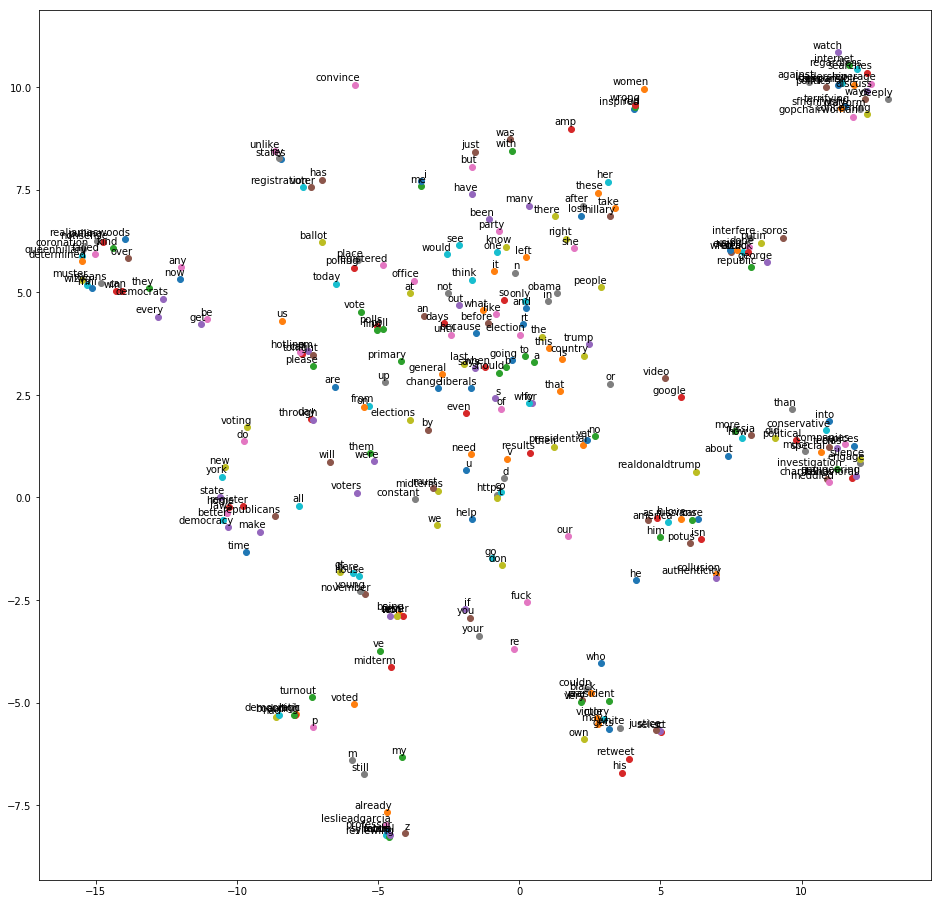

In [45]:
tsne_plot(Bigmodel)

# 3. Sandbox Time!

I want to explore the data with you. How would you explore these Tweets? You tell me what to do, I'll code it.

Possible analyses:

* Compare subjectivity and polarity using other categories of metadata (e.g., number of followers, etc.)
* Compare subjectivity and polarity using other keywords
* Compare more frequent words based on metadata categories
* Explore different keywords using the word vector model

Question: What is metadata? What are the metadata categories in this dataset?

In [46]:
#As a reminder, here are our metadata categories
df.columns.values

array(['from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str', 'text_lc',
       'polarity', 'subjectivity', 'text_wv'], dtype=object)

In [47]:
# New code here!

# 4. Promises and Pitfalls

## Group Discussion:

What do you now see as the promises and pitfalls of using Twitter as data for campaigns? Briefly discuss with those around you, and then we'll have a larger group discussion.

## My thoughts:

## Promises:

* Real-Time Data
* Large Scale
* Fast
* "Found data", or not gathered via interference from a researcher

## Pitfalls:

* Different platforms, different uses, different people (not representative)
* Can be volatile: *when* you collect your Tweets matters
* Non-sophisticated algorithms - irony, sarcasm, humor
* Bots
* Examples below:

![title](https://mobloggy.com/images/Social-Media-Explained-with-Coffee.png)




https://www.businessinsider.com/social-media-demographics-the-identity-of-each-major-social-network-2013-9

![title](https://amp.businessinsider.com/images/523b787c69bedda311647578-750-563.jpg) 

![title](https://amp.businessinsider.com/images/523b81ec69bedd662064757f-750-563.jpg) 


## Want to learn more?

If you are interested in Computational Social Science, data analytics, ethical implications, and any of the topics we covered today, we encourage you to begin looking at potential courses or minors you might pursue!

- Computational Social Science minor
- Digital Minor
- Combined major in Computer Science and CSSH
- Other courses you might take: DS 2000/DS 20001 (Data Science) 


### Follow the NULab for workshops, events, potential courses, and more!

- https://web.northeastern.edu/nulab/ 
- @NUlabTMN on Twitter

### Our Contact Information
- Laura Nelson (l.nelson@northeastern.edu), Department of Sociology and Anthropology
- Cara Messina (messina.c@husky.neu.edu), NULab Coordinator: Office Hours: 409 Nightingale Hall, Tuesdays 12-1
- Alexis Yohros (yohros.a@husky.neu.edu), Digital Teaching Integration RA